In [19]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import networkx as nx

from netgraph import Graph, InteractiveGraph

from networkx.algorithms.community import girvan_newman, modularity_max, louvain_communities

from visu_utils import *


# sns style white
sns.set_style("whitegrid")


In [20]:

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:

PREFIX = "mteb_ds"
df = pd.read_csv('exported_data/normalized_13.df')



In [22]:

df = text_embeddings_metadata_results_preprocessing(df, models=MODELS_MAIN_EXPES)
METRIC = "I(X_1->X_2)"

table = make_table_pivot(METRIC, df)


In [23]:


METRICS = ['Average (56 datasets)', 'Classification Average (12 datasets)', 'Clustering Average (11 datasets)', 'Retrieval Average (15 datasets)', 'STS Average (10 datasets)', 'Reranking Average (4 datasets)']

mteb = pd.read_csv('exported_data/df_mteb_avg.csv')

import re

def extract_url_from_html_link(html):
    return re.findall(r'href=[\'"]?([^\'" >]+)', html)[0]

mteb['model'] = mteb['Model'].apply(extract_url_from_html_link).apply(lambda x: "/".join(x.split('/')[-2:]))

avg_results = table.median(axis=0).sort_values(ascending=False).to_frame().reset_index().rename(columns={0: METRIC, 'model_1': 'model'}).merge(mteb, on='model', how='left').sort_values(METRIC, ascending=False)

# make model shorter
avg_results['model'] = avg_results['model'].apply(lambda x: x.split('/')[-1])




In [24]:

avg_results


,model,I(X_1->X_2),Rank,Model,Model Size (Million Parameters),"Memory Usage (GB, fp32)",Embedding Dimensions,Max Tokens,Average (56 datasets),Classification Average (12 datasets),Clustering Average (11 datasets),PairClassification Average (3 datasets),Reranking Average (4 datasets),Retrieval Average (15 datasets),STS Average (10 datasets),Summarization Average (1 datasets)
0,stella-base-en-v2,495.112824,33.0,"<a target=""_blank"" style=""text-decoration: und...",55.0,0.20,768.0,512.0,62.61,75.28,44.90,86.45,58.78,50.10,83.02,32.52
1,SFR-Embedding-Mistral,478.156678,2.0,"<a target=""_blank"" style=""text-decoration: und...",7111.0,26.49,4096.0,32768.0,67.56,78.33,51.67,88.54,60.64,59.00,85.05,31.16
2,gtr-t5-large,474.211407,80.0,"<a target=""_blank"" style=""text-decoration: und...",168.0,0.63,768.0,512.0,58.28,67.14,41.60,85.32,55.36,47.42,78.19,29.50
3,GIST-Embedding-v0,466.770923,25.0,"<a target=""_blank"" style=""text-decoration: und...",109.0,0.41,768.0,512.0,63.71,76.03,46.21,86.32,59.37,52.31,83.51,30.87
4,gte-base,465.425725,34.0,"<a target=""_blank"" style=""text-decoration: und...",109.0,0.41,768.0,512.0,62.39,73.01,46.20,84.57,58.61,51.14,82.30,31.17
5,gtr-t5-xl,461.141969,78.0,"<a target=""_blank"" style=""text-decoration: und...",1240.0,4.62,768.0,512.0,58.42,67.11,41.51,86.13,55.96,47.96,77.80,30.21
6,bge-base-en-v1.5,458.418274,26.0,"<a target=""_blank"" style=""text-decoration: und...",109.0,0.41,768.0,512.0,63.55,75.53,45.77,86.55,58.86,53.25,82.40,31.07
7,echo-mistral-7b-instruct-lasttoken,455.995230,12.0,"<a target=""_blank"" style=""text-decoration: und...",7111.0,26.49,4096.0,32768.0,64.68,77.43,46.32,87.34,58.14,55.52,82.56,30.73
8,gte-large,452.883004,30.0,"<a target=""_blank"" style=""text-decoration: und...",335.0,1.25,1024.0,512.0,63.13,73.33,46.84,85.00,59.13,52.22,83.35,31.66
9,e5-large-v2,448.757798,38.0,"<a target=""_blank"" style=""text-decoration: und...",335.0,1.25,1024.0,512.0,62.25,75.24,44.49,86.03,56.61,50.56,82.05,30.19


../../../papers/emir-embedding-comparison/fig/nlp/mteb_ds_scatterplot_mtebs_IX_1toX_2.pdf


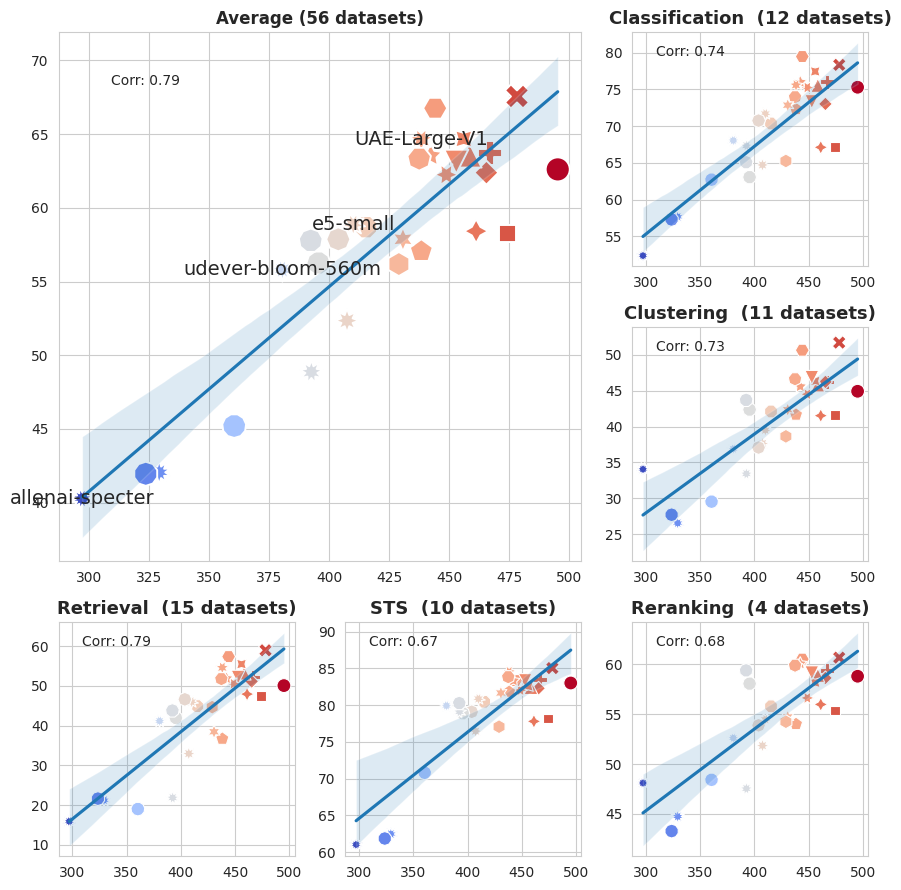

In [25]:
# make mosaic map

mosaic_map = [
    ['A', 'A', 'B'],
    ['A', 'A', 'C'],
    ['D', 'E', 'F'],
              ]

mosaic_to_task_map = {
    'A': 'Average (56 datasets)',
    'B': 'Classification Average (12 datasets)',
    'C': 'Clustering Average (11 datasets)',
    'D': 'Retrieval Average (15 datasets)',
    'E': 'STS Average (10 datasets)',
    'F': 'Reranking Average (4 datasets)',
}

mosaic_map = np.array(mosaic_map)
mosaic_map = np.vectorize(lambda x: mosaic_to_task_map[x])(mosaic_map)

MODEL_TO_ANNOATE = set(["UAE-Large-V1", "allenai-specter", "e5-small",  "udever-bloom-560m",])

fig, ax = plt.subplot_mosaic(mosaic_map, figsize=(9, 9))

for i, metric in enumerate(METRICS):
    if metric == "Average (56 datasets)":
        s = 300
    else:
        s = 100
    
    ax[metric] = sns.scatterplot(data=avg_results, x=METRIC, y=metric, ax=ax[metric], legend=False, hue = METRIC, style='model', s=s, palette="coolwarm")
    ax[metric] = sns.regplot(data=avg_results, x=METRIC, y=metric, ax=ax[metric], scatter=False)
    
    # annotate model names
    if metric == "Average (56 datasets)":
        for i, row in avg_results.iterrows():
           if row['model'] in MODEL_TO_ANNOATE: 
               ax[metric].annotate(row['model'], (row[METRIC], row[metric]), fontsize=14,  va='center', ha='center')
                
    
    # annotate correllation
    corr = avg_results[[METRIC, metric]].corr(method="spearman").iloc[0, 1]
    ax[metric].annotate(f"Corr: {corr:.2f}", (0.1, 0.9), xycoords='axes fraction')
    
    if metric == 'Average (56 datasets)':
        ax[metric].set_title(metric, fontsize=12, fontweight='bold')
    else:
        ax[metric].set_title(metric.replace('Average', ''), fontsize=13, fontweight='bold')
    ax[metric].set_xlabel('')
    ax[metric].set_ylabel('')
    

fig.tight_layout()

path = Path(f"../../../papers/emir-embedding-comparison/fig/nlp/{PREFIX}_scatterplot_mtebs_{sanitize_metric_name(METRIC)}.pdf")
print(path)
path.parent.mkdir(parents=True, exist_ok=True)
fig.savefig(path, bbox_inches='tight')


/tmp/ipykernel_341984/3909185060.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bar_ranking, y='model', x=METRIC, ax=ax[0], palette="coolwarm_r")
/tmp/ipykernel_341984/3909185060.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bar_ranking, y='model', x='Average (56 datasets)', ax=ax[1], palette="coolwarm_r")
/tmp/ipykernel_341984/3909185060.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=20, fontweight='bold')
/tmp/ipykernel_341984/3909185060.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be ma

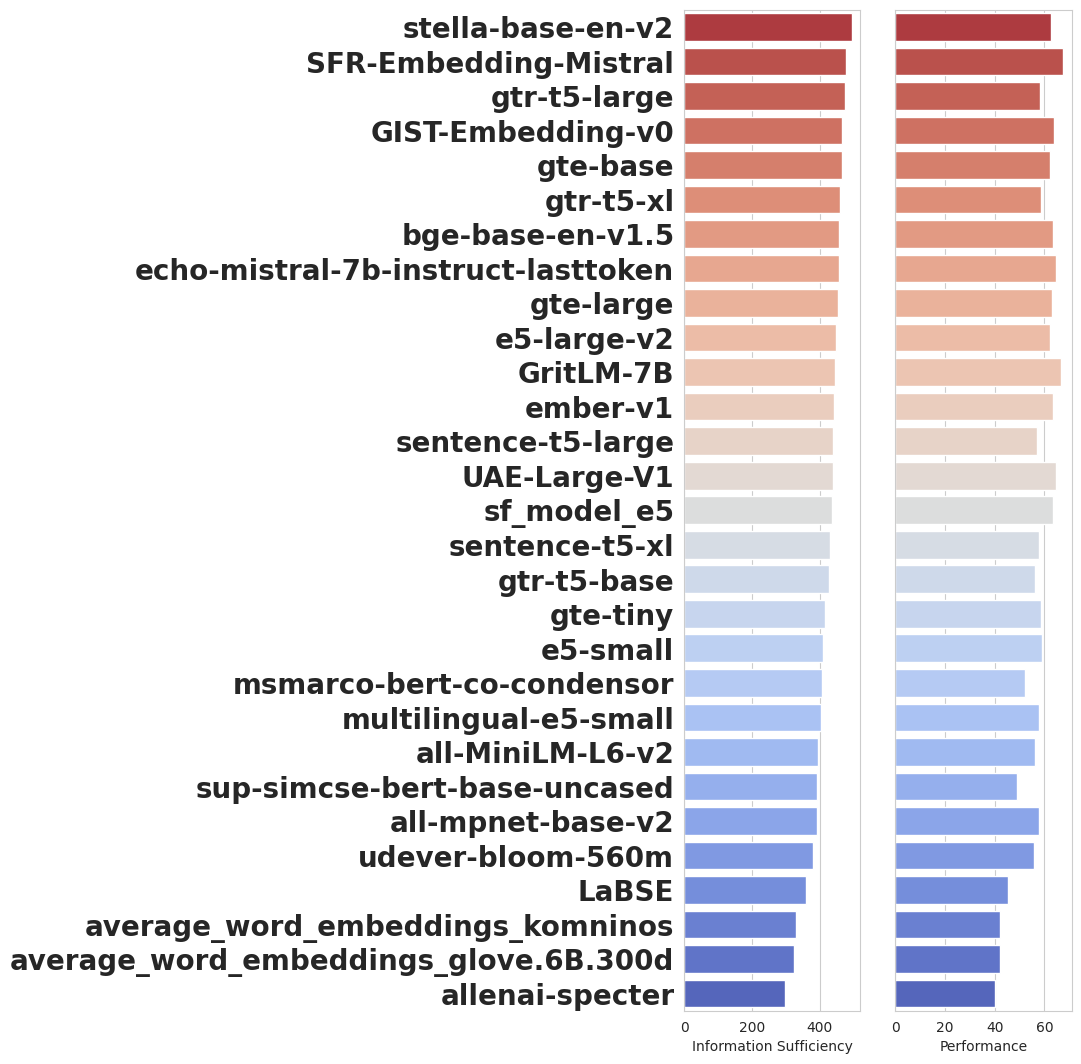

In [26]:

bar_ranking = avg_results[['model', METRIC, 'Average (56 datasets)']].dropna()
bar_ranking['Informativeness Rank'] = bar_ranking[METRIC].rank(ascending=False)
bar_ranking['Performance Rank'] = bar_ranking['Average (56 datasets)'].rank(ascending=False)

bar_ranking = bar_ranking.sort_values('Informativeness Rank')

fig, ax = plt.subplots(ncols=2, figsize=(5, 13), sharey=True)

# horizontal barplot
sns.barplot(data=bar_ranking, y='model', x=METRIC, ax=ax[0], palette="coolwarm_r")
# ax[0].set_xlim(.3, .6)
ax[0].set_ylabel('')
ax[0].set_xlabel('Information Sufficiency')


sns.barplot(data=bar_ranking, y='model', x='Average (56 datasets)', ax=ax[1], palette="coolwarm_r")
# ax[1].set_xlim(35, 70)
ax[1].set_ylabel('')
ax[1].set_xlabel('Performance')


ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=20, fontweight='bold')

fig.tight_layout()

path = Path(f"../../../papers/emir-embedding-comparison/fig/nlp/{PREFIX}_barplot_ranking_mtebs_{sanitize_metric_name(METRIC)}.pdf")
path.parent.mkdir(parents=True, exist_ok=True)
fig.savefig(path, bbox_inches='tight')


In [27]:
# dims = df.groupby('model_1')['d_1'].first().reset_index().rename(columns={'model_1': 'model', 'd_1': 'Embedding Dimensions'})
# avg_results_ = avg_results.join(dims, on='model', how='left')

In [28]:
avg_results['Embedding Dimensions']

0      768.0
1     4096.0
2      768.0
3      768.0
4      768.0
5      768.0
6      768.0
7     4096.0
8     1024.0
9     1024.0
10    4096.0
11    1024.0
12     768.0
13    1024.0
14    1024.0
15     768.0
16     768.0
17       NaN
18     384.0
19       NaN
20       NaN
21     384.0
22       NaN
23     768.0
24     384.0
25       NaN
26     384.0
27     768.0
28     768.0
29    1024.0
30     768.0
31     300.0
32     300.0
33     768.0
Name: Embedding Dimensions, dtype: float64

KeyError: "['Model Size (GB)'] not in index"

# Perfs per clusters

In [ ]:
# Ranking per task and close models

In [ ]:
# Select communities 